In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv.txt")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
import numpy as np

In [8]:
# There are no NaN values in the dataset
# All the features are numerical
# Checking the cardinality of the numerical features
for feature in df.columns:
    if len(np.unique(df[feature]))<=30:
        print(f"Cardinality of {feature} : {len(np.unique(df[feature]))}")

Cardinality of Pregnancies : 17
Cardinality of Outcome : 2


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
discrete_numerical_features=['Pregnancies','Outcome']

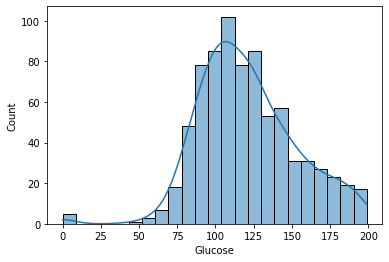

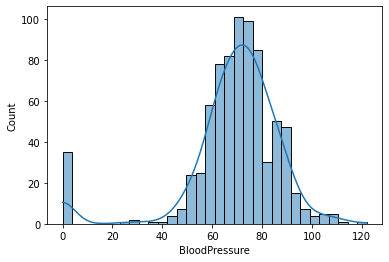

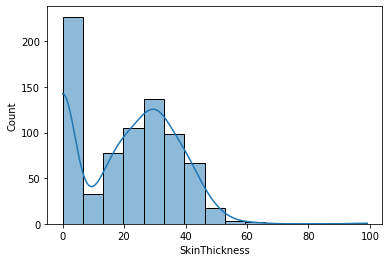

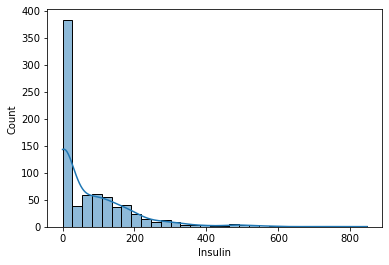

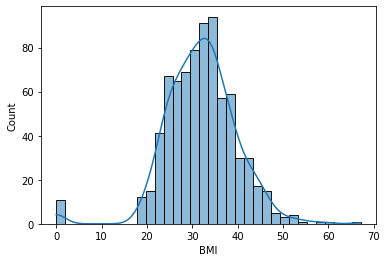

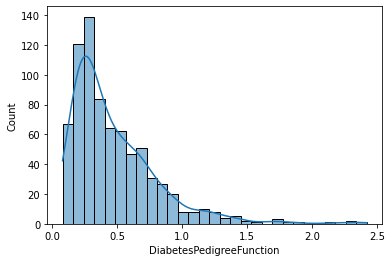

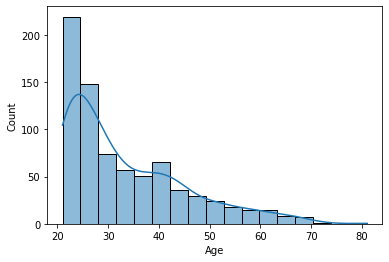

In [11]:
for feature in df.columns:
    if feature not in discrete_numerical_features:
        sns.histplot(data=df[feature],kde=True)
        plt.show()

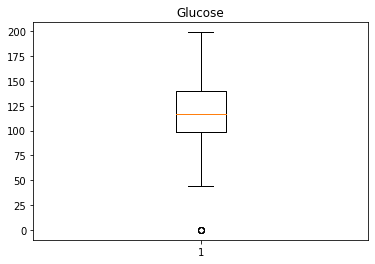

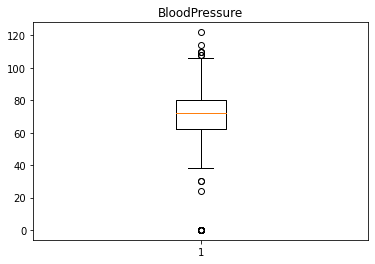

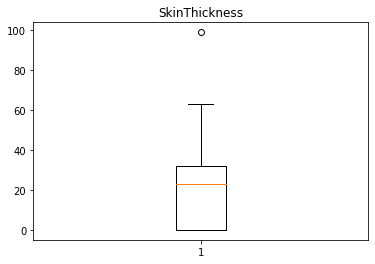

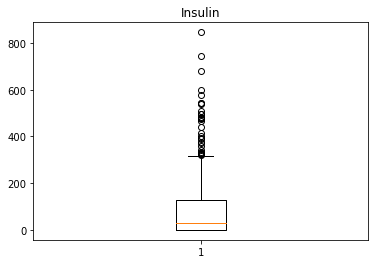

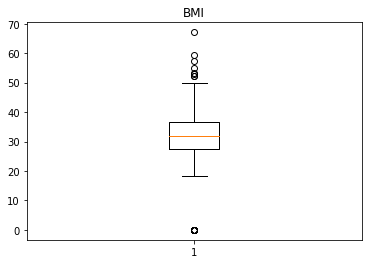

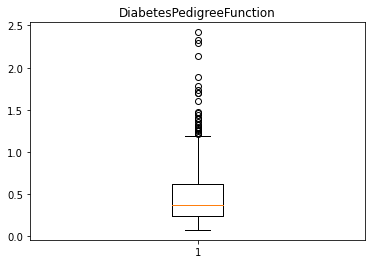

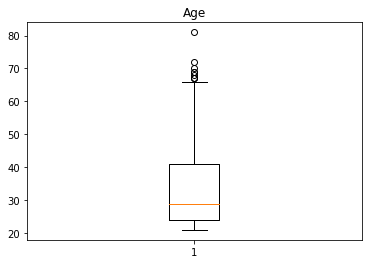

In [12]:
# Almost every features donot follow a normal distribution
# Let's find the outliers with the help of boxplot
for feature in df.columns:
    if feature not in discrete_numerical_features:
        plt.boxplot(x=df[feature])
        plt.title(feature)
        plt.show()

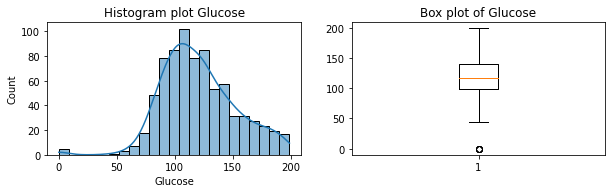

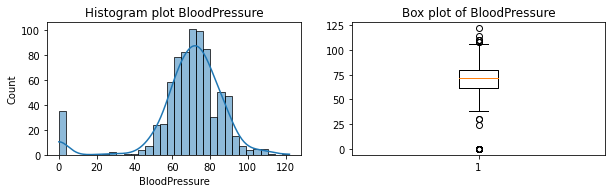

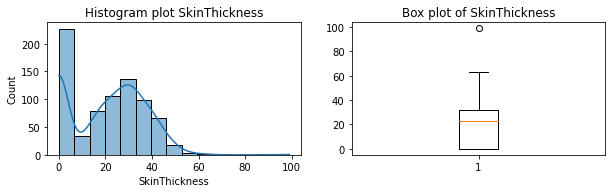

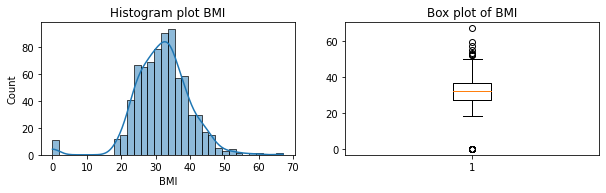

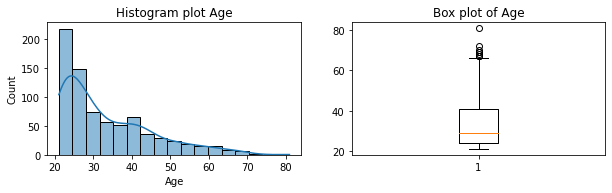

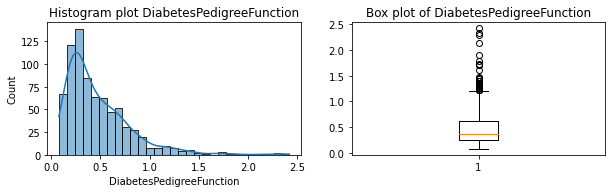

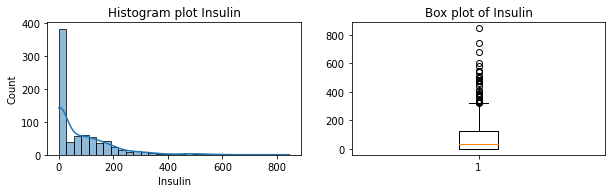

In [13]:
def Compare_plots(data,lst,l):
    for index,feature in enumerate(lst):
        fig= plt.figure(figsize=(10,20))
        plt.subplot(l,2,2*(index)+1)
        sns.histplot(data[feature],kde=True)
        plt.title(f"Histogram plot {feature}")

        plt.subplot(l,2,2*(index)+2)
        plt.boxplot(x=data[feature])
        plt.title(f"Box plot of {feature}")
        plt.show()
lst=['Glucose','BloodPressure','SkinThickness','BMI','Age','DiabetesPedigreeFunction','Insulin']
l=len(lst)
Compare_plots(df,lst,l)

In [14]:
def IQR(feature,data):
    outlier=[]
    q1,q3=np.percentile(data[feature],[25,75])
    iqr=q3-q1
    lower=q1-1.5*(iqr)
    upper=q3+1.5*(iqr)
    for i in data[feature]:
        if i<lower or i>upper:
            outlier.append(i)
    return outlier

for feature in df.columns:
    if feature not in discrete_numerical_features:
        out=IQR(feature,df)
        print(f"Outliers of {feature} : {len(out)}")

Outliers of Glucose : 5
Outliers of BloodPressure : 45
Outliers of SkinThickness : 1
Outliers of Insulin : 34
Outliers of BMI : 19
Outliers of DiabetesPedigreeFunction : 29
Outliers of Age : 9


In [15]:
def Z_score(feature,data):
    outlier=[]
    mean=np.mean(data[feature])
    std=np.std(data[feature])
    for i in data[feature]:
        if np.abs((i-mean)/std)>3:
            outlier.append(i)
    return outlier

for feature in df.columns:
    if feature not in discrete_numerical_features:
        out=Z_score(feature,df)
        print(f"Outliers of {feature} : {len(out)}")

Outliers of Glucose : 5
Outliers of BloodPressure : 35
Outliers of SkinThickness : 1
Outliers of Insulin : 18
Outliers of BMI : 14
Outliers of DiabetesPedigreeFunction : 11
Outliers of Age : 5


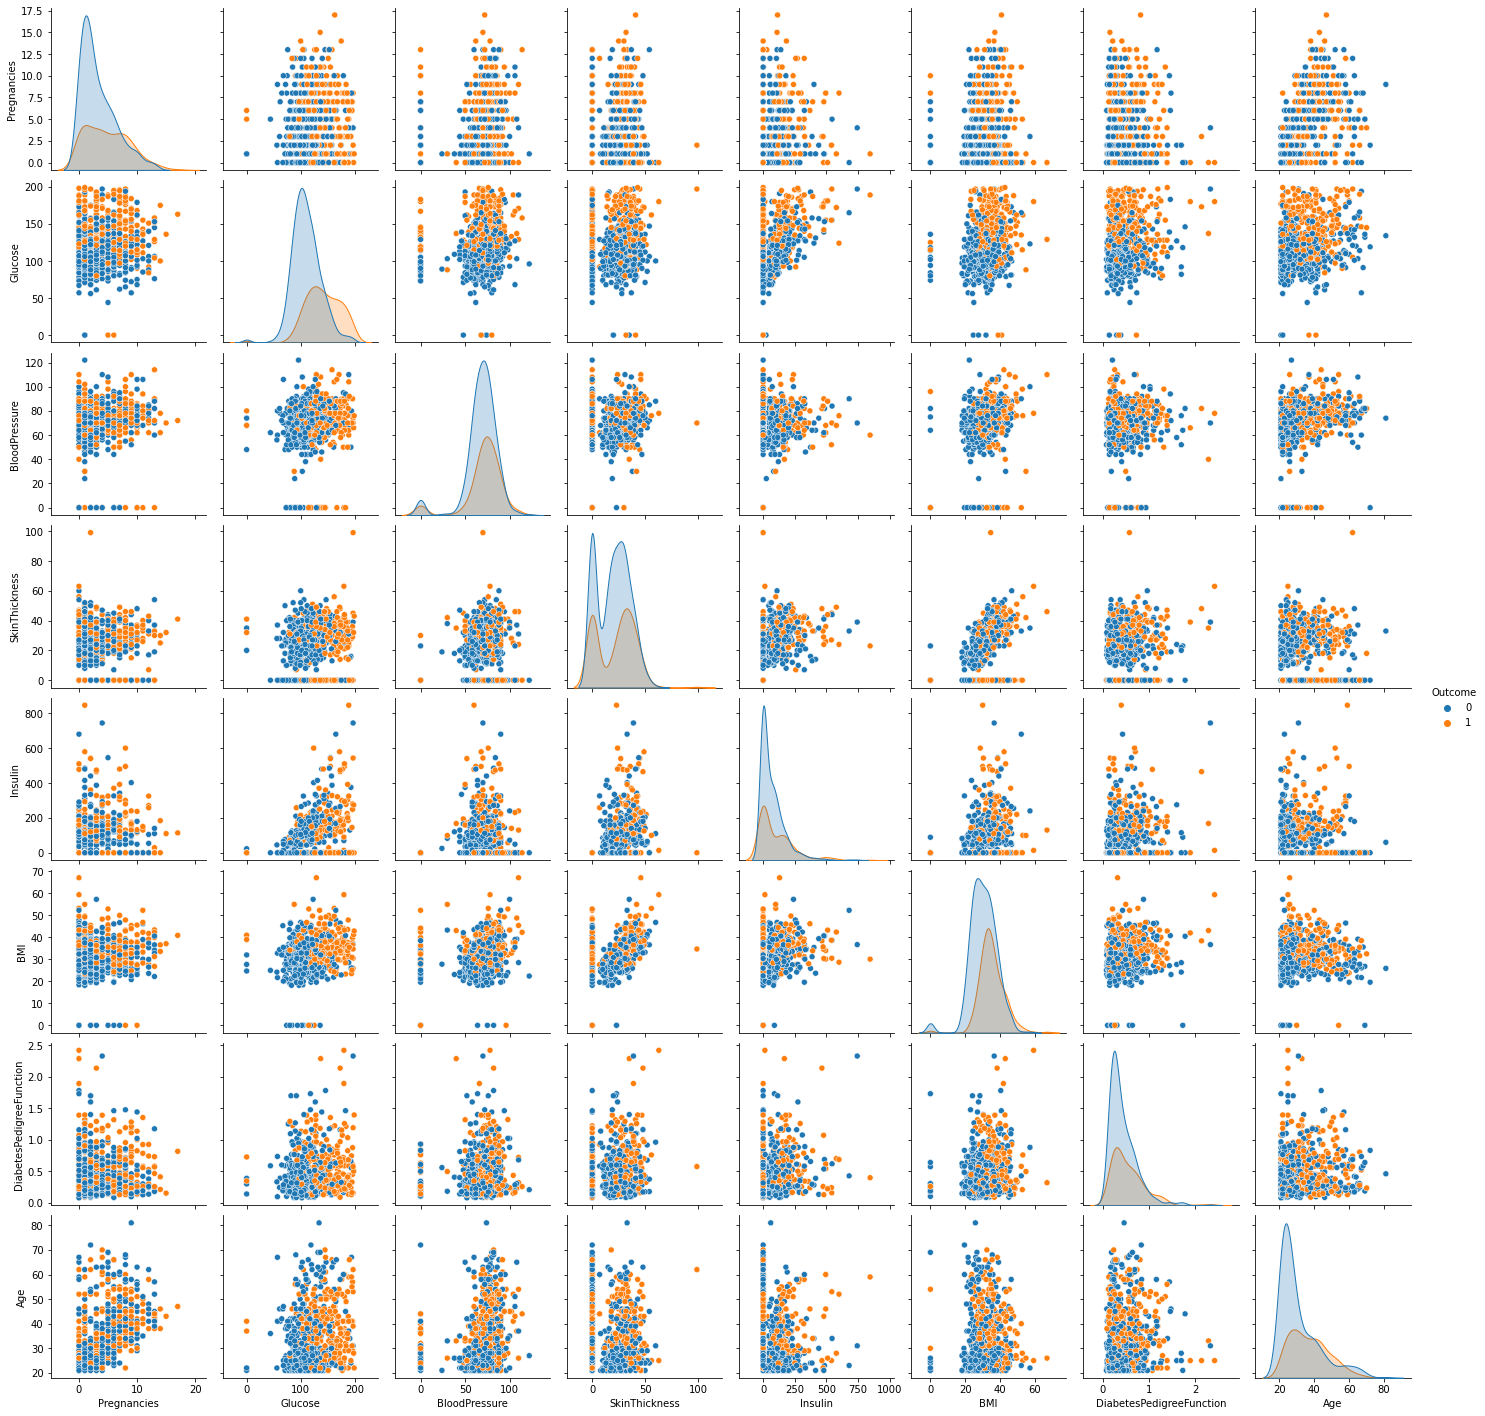

In [16]:
sns.pairplot(df,hue='Outcome')

<AxesSubplot:>

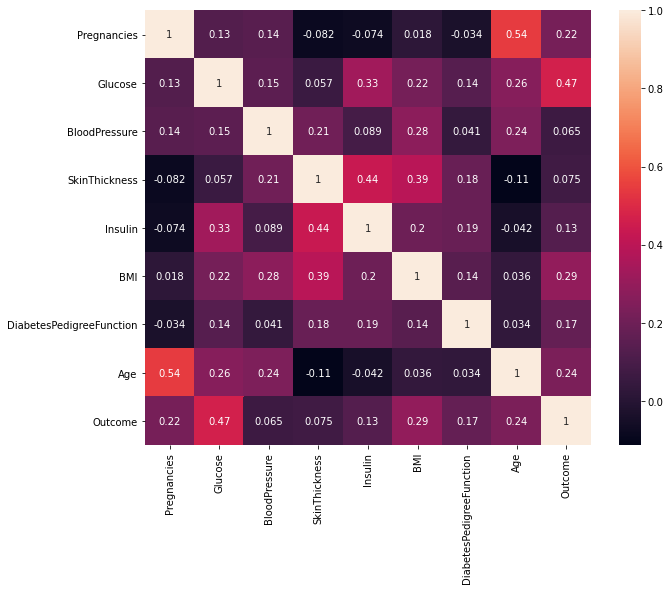

In [17]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

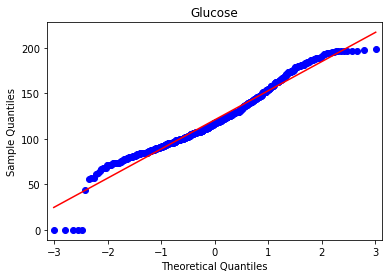

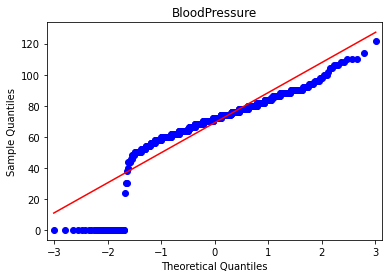

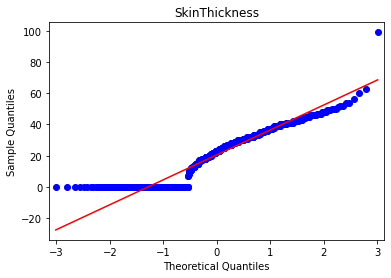

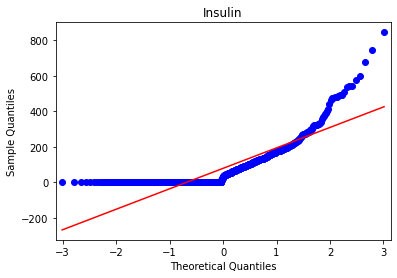

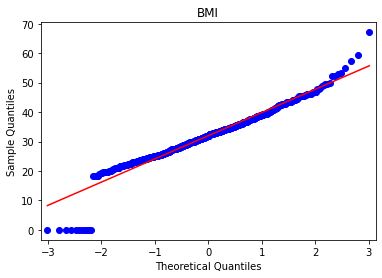

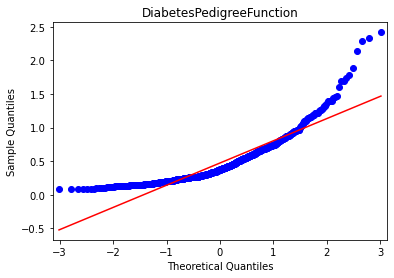

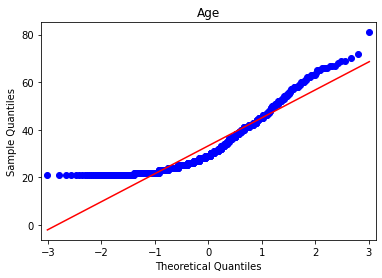

In [18]:
import statsmodels.api as sm
for feature in df.columns:
    if feature not in discrete_numerical_features:
        sm.qqplot(df[feature],line='s')
        plt.title(feature)
        plt.show()

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [20]:
# Based on the domain knowledge and the type of problem which we are solving it is not possible that Glucose ,BloodPressure
#,SkinThickness ,BMI can be zero
nan_data=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
nan_data=nan_data.replace(0,np.nan)
nan_data.isnull().sum()# Checking the number of nan values present

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [21]:
nan_data.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  763.000000     733.000000     541.000000  394.000000  757.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.535641      12.382158      10.476982  118.775855    6.924988
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.000000      64.000000      22.000000   76.250000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    141.000000      80.000000      36.000000  190.000000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000

<AxesSubplot:>

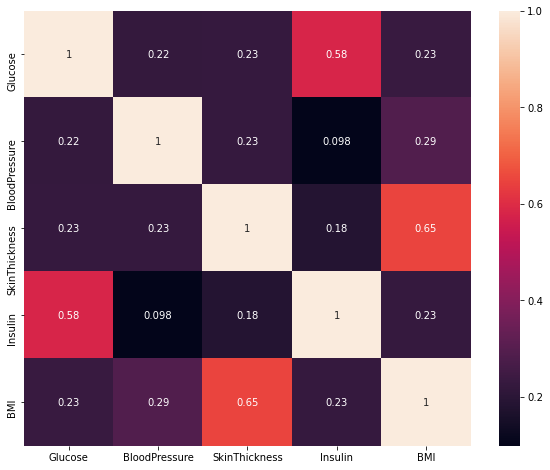

In [22]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(nan_data.corr(),annot=True)

In [23]:
# Replacing the nan of glucose with the median value
nan_data['Glucose']=nan_data['Glucose'].fillna(117)
nan_data['Glucose'].isnull().sum()

0

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

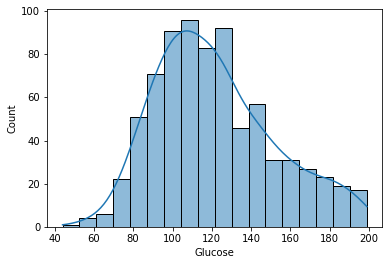

In [24]:
# Checking the distribution of Glucose after imputation of 0's
sns.histplot(data=nan_data,x='Glucose',kde=True)

In [25]:
# Replacing the 0's of BMI with median
nan_data['BMI']=nan_data['BMI'].fillna(32.30)
nan_data['BMI'].isnull().sum()

0

<AxesSubplot:xlabel='BMI', ylabel='Count'>

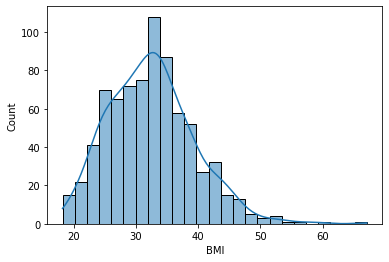

In [26]:
# Checking the distribution of Glucose after imputation of 0's
sns.histplot(data=nan_data,x='BMI',kde=True)

<ipython-input-27-5f53b1780da1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['BloodPressure']=c['BloodPressure'].replace(0,np.nan)


<AxesSubplot:>

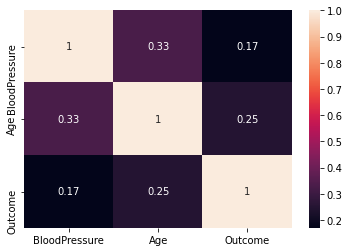

In [27]:
# Checking the correlation between BloodPressure and Outcome
c=df[['BloodPressure','Age','Outcome']]
c['BloodPressure']=c['BloodPressure'].replace(0,np.nan)
c=c.dropna()
sns.heatmap(c.corr(),annot=True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

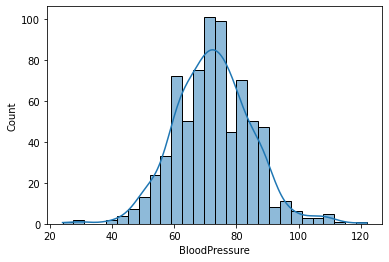

In [28]:
# Imputing BloodPressure with the help of Age
impute_bp=df[['BloodPressure','Age']]
impute_bp=impute_bp.replace(0, np.NaN) # Replacing the 0's with nan and then visualising
sns.histplot(data=impute_bp,x='BloodPressure',kde=True)

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
fill_bp = pd.DataFrame(imputer.fit_transform(impute_bp),columns = impute_bp.columns)
fill_bp

BloodPressure   Age
0             72.0  50.0
1             66.0  31.0
2             64.0  32.0
3             66.0  21.0
4             40.0  33.0
..             ...   ...
763           76.0  63.0
764           70.0  27.0
765           72.0  30.0
766           60.0  47.0
767           70.0  23.0

[768 rows x 2 columns]

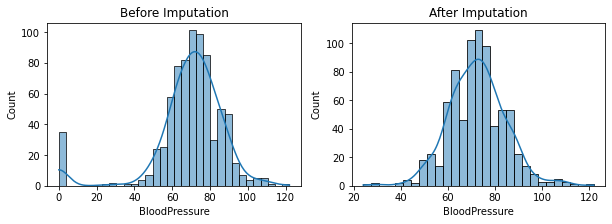

In [30]:
def Compare_HistPlots(df,data,lst,l):
    for index,feature in enumerate(lst):
        plt.subplot(l,2,2*(index)+1)
        sns.histplot(df[feature],kde=True)
        plt.title("Before Imputation")

        plt.subplot(l,2,2*(index)+2)
        sns.histplot(data[feature],kde=True)
        plt.title("After Imputation")
        plt.show()

fig= plt.figure(figsize=(10,3))
Compare_HistPlots(df,fill_bp,['BloodPressure'],1)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

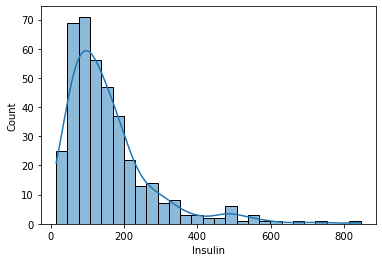

In [31]:
glucose=nan_data[['Glucose']]
impute_insulin=pd.concat([glucose,df[['Insulin']]],axis=1)
impute_insulin=impute_insulin.replace(0, np.NaN) # Replacing the 0's with nan and then visualising
sns.histplot(data=impute_insulin,x='Insulin',kde=True)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

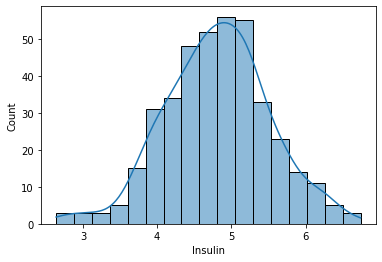

In [32]:
# Plotting after log transformation 
sns.histplot(data=np.log(impute_insulin),x='Insulin',kde=True)

In [33]:
# Imputing the 0 values in insulin with the help of Glucose feature by KNN imputer since glucose and insulin are having a close to linear relationship
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
fill_insulin = pd.DataFrame(imputer.fit_transform(np.log(impute_insulin)),columns = impute_insulin.columns)# Getting a normal distribution when we are imputation after log transformation
fill_insulin

Glucose   Insulin
0    4.997212  5.318151
1    4.442651  4.219834
2    5.209486  5.591840
3    4.488636  4.543295
4    4.919981  5.123964
..        ...       ...
763  4.615121  5.192957
764  4.804021  5.093567
765  4.795791  4.718499
766  4.836282  4.854115
767  4.532599  4.555489

[768 rows x 2 columns]

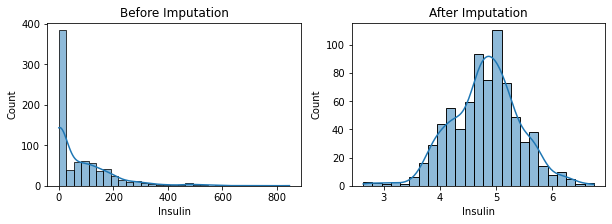

In [34]:
# Comparing the distribution of insulin after imputation
fig= plt.figure(figsize=(10,3))
Compare_HistPlots(df,fill_insulin,['Insulin'],1)

In [35]:
len(IQR('Insulin',fill_insulin))

14

In [36]:
# Normal: Lower than 80
# Stage 1 hypertension: 80-89
# Stage 2 hypertension: 90 or more
# Hypertensive crisis: 120 or more.
# Making a new feature based on the Blood Pressure value
def BP_Type(val):
    if val<=80:
        return 'normal'
    else:
        return 'hypertension'
fill_bp['BP_Type']=fill_bp['BloodPressure'].apply(BP_Type)
fill_bp.head()

BloodPressure   Age BP_Type
0           72.0  50.0  normal
1           66.0  31.0  normal
2           64.0  32.0  normal
3           66.0  21.0  normal
4           40.0  33.0  normal

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

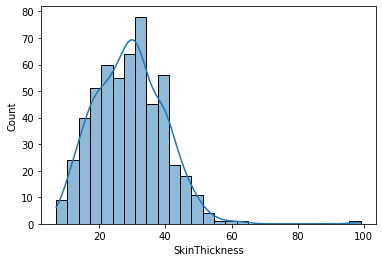

In [37]:
# Since the SkinThickness has huge number of 0's we can't replace them with median.
bmi=nan_data[['BMI']]
impute_skin=pd.concat([bmi,df[['SkinThickness']]],axis=1)
impute_skin=impute_skin.replace(0, np.NaN) # Replacing the 0's with nan and then visualizing
sns.histplot(data=impute_skin,x='SkinThickness',kde=True)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

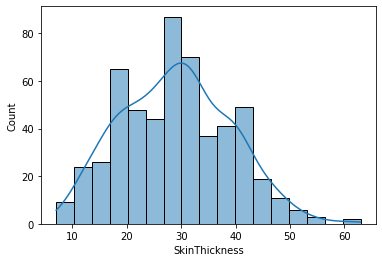

In [38]:
impute_skinTh=impute_skin.replace(99,np.percentile(df['SkinThickness'],90))# Remove the extreme outlier with the 90 percentile value
sns.histplot(data=impute_skinTh,x='SkinThickness',kde=True)

In [39]:
# Using KNN Imputer to predict the values of SkinThickness with the help of BMI
from sklearn.impute import KNNImputer
imputer1 = KNNImputer(n_neighbors=5)
fill_skinTh = pd.DataFrame(imputer1.fit_transform(impute_skinTh),columns = impute_skinTh.columns)# Getting a normal distribution when we are imputation after log transformation
fill_skinTh

BMI  SkinThickness
0    33.6           35.0
1    26.6           29.0
2    23.3           16.8
3    28.1           23.0
4    43.1           35.0
..    ...            ...
763  32.9           48.0
764  36.8           27.0
765  26.2           23.0
766  30.1           28.6
767  30.4           31.0

[768 rows x 2 columns]

In [40]:
fill_skinTh.isnull().sum()

BMI              0
SkinThickness    0
dtype: int64

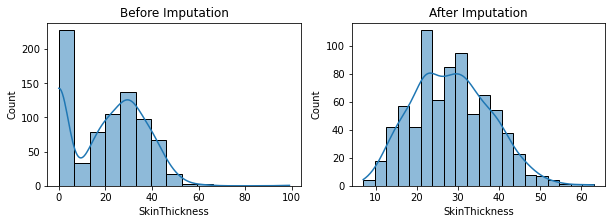

In [41]:
# Comparing the distribution of SkinThickness after imputation
fig= plt.figure(figsize=(10,3))
Compare_HistPlots(df,fill_skinTh,['SkinThickness'],1)

In [42]:
len(IQR('SkinThickness',fill_skinTh))

3

In [43]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [44]:
data4=pd.concat([nan_data[['Glucose','BMI']],fill_bp[['BloodPressure','BP_Type']],fill_insulin[['Insulin']],fill_skinTh[['SkinThickness']],df[['DiabetesPedigreeFunction','Age','Pregnancies','Outcome']]],axis=1)
data4.head() # Fixed the NaN values

Glucose   BMI  BloodPressure BP_Type   Insulin  SkinThickness  \
0    148.0  33.6           72.0  normal  5.318151           35.0   
1     85.0  26.6           66.0  normal  4.219834           29.0   
2    183.0  23.3           64.0  normal  5.591840           16.8   
3     89.0  28.1           66.0  normal  4.543295           23.0   
4    137.0  43.1           40.0  normal  5.123964           35.0   

   DiabetesPedigreeFunction  Age  Pregnancies  Outcome  
0                     0.627   50            6        1  
1                     0.351   31            1        0  
2                     0.672   32            8        1  
3                     0.167   21            1        0  
4                     2.288   33            0        1

In [45]:
data4.isnull().sum()

Glucose                     0
BMI                         0
BloodPressure               0
BP_Type                     0
Insulin                     0
SkinThickness               0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [46]:
data4.describe()

Glucose         BMI  BloodPressure     Insulin  SkinThickness  \
count  768.000000  768.000000     768.000000  768.000000     768.000000   
mean   121.656250   32.455208      72.373958    4.814346      28.433333   
std     30.438286    6.875177      12.157624    0.608029       9.436252   
min     44.000000   18.200000      24.000000    2.639057       7.000000   
25%     99.750000   27.500000      64.000000    4.422421      22.000000   
50%    117.000000   32.300000      72.000000    4.831200      28.000000   
75%    140.250000   36.600000      80.000000    5.192957      35.000000   
max    199.000000   67.100000     122.000000    6.740519      63.000000   

       DiabetesPedigreeFunction         Age  Pregnancies     Outcome  
count                768.000000  768.000000   768.000000  768.000000  
mean                   0.471876   33.240885     3.845052    0.348958  
std                    0.331329   11.760232     3.369578    0.476951  
min                    0.078000   21.000000     0.000000    0.000000  
25%                    0.243750   24.000000     1.000000    0.000000  
50%                    0.372500   29.000000     3.000000    0.000000  
75%                    0.626250   41.000000     6.000000    1.000000  
max                    2.420000   81.000000    17.000000    1.000000

In [47]:
x=data4.drop('Outcome',axis=1)
y=data4['Outcome']
x.shape,y.shape

((768, 9), (768,))

In [48]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [49]:
# Fixing the imbalanced dataset with the help of upsamplying
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=0.9)
X, Y = os.fit_resample(x,y)

In [50]:
Y.value_counts()

0    500
1    450
Name: Outcome, dtype: int64

In [51]:
data5=pd.concat([X,Y],axis=1)
print(f"Shape of the new dataframe : {data5.shape}\n Shape of the old dataframe : {data4.shape}") # Shape of the new dataframe after over samplying

Shape of the new dataframe : (950, 10)
 Shape of the old dataframe : (768, 10)


In [52]:
data5.isnull().sum()

Glucose                     0
BMI                         0
BloodPressure               0
BP_Type                     0
Insulin                     0
SkinThickness               0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [53]:
data5.describe()

Glucose         BMI  BloodPressure     Insulin  SkinThickness  \
count  950.000000  950.000000     950.000000  950.000000     950.000000   
mean   125.484211   33.102947      73.101053    4.869193      29.081684   
std     31.427493    6.994194      12.649126    0.596966       9.374614   
min     44.000000   18.200000      24.000000    2.639057       7.000000   
25%    102.000000   28.300000      65.000000    4.532127      22.000000   
50%    122.000000   32.700000      72.000000    4.867534      29.000000   
75%    146.000000   37.200000      80.000000    5.254830      36.000000   
max    199.000000   67.100000     122.000000    6.740519      63.000000   

       DiabetesPedigreeFunction         Age  Pregnancies     Outcome  
count                950.000000  950.000000   950.000000  950.000000  
mean                   0.490846   33.897895     4.071579    0.473684  
std                    0.336478   11.546082     3.480963    0.499570  
min                    0.078000   21.000000     0.000000    0.000000  
25%                    0.252250   24.000000     1.000000    0.000000  
50%                    0.392000   30.500000     3.000000    0.000000  
75%                    0.660000   41.000000     7.000000    1.000000  
max                    2.420000   81.000000    17.000000    1.000000

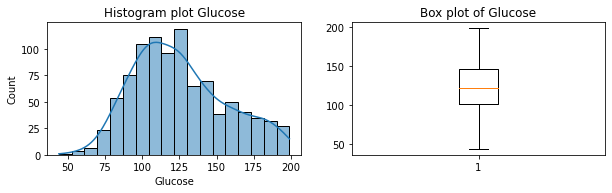

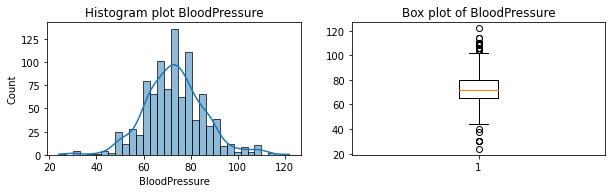

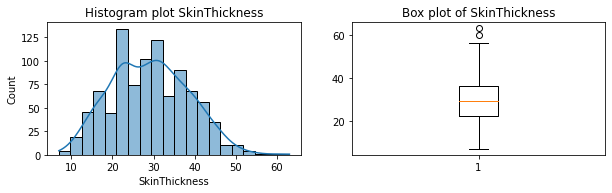

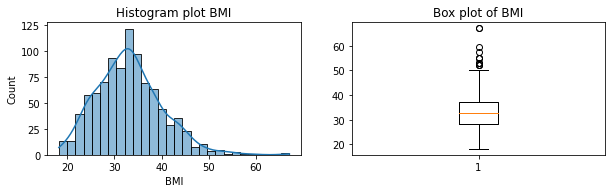

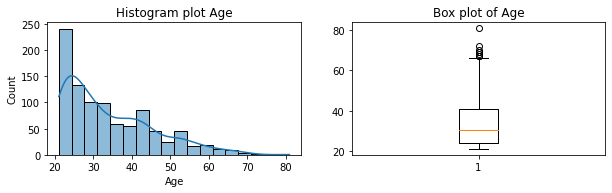

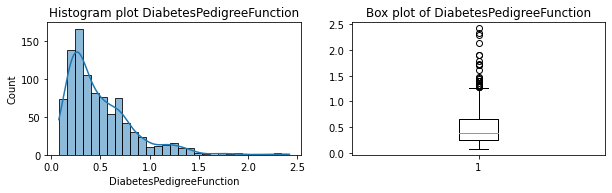

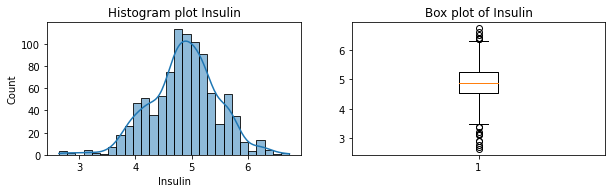

In [54]:
Compare_plots(data5,lst,l)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

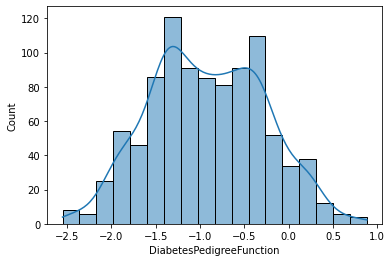

In [55]:
# Trying log transformation on DiabetesPedigreeFunction
dp=data5[['DiabetesPedigreeFunction']]
dp_log=np.log(dp)
sns.histplot(data=dp_log,x='DiabetesPedigreeFunction',kde=True)

In [56]:
len(IQR('DiabetesPedigreeFunction',dp_log))

0

In [57]:
# The DiabetesPedigreeFunction has a normal distribution if log transformation is done
data5['DiabetesPedigreeFunction']=data5['DiabetesPedigreeFunction'].apply(lambda val:np.log(val))
data5.head()

Glucose   BMI  BloodPressure BP_Type   Insulin  SkinThickness  \
0    148.0  33.6           72.0  normal  5.318151           35.0   
1     85.0  26.6           66.0  normal  4.219834           29.0   
2    183.0  23.3           64.0  normal  5.591840           16.8   
3     89.0  28.1           66.0  normal  4.543295           23.0   
4    137.0  43.1           40.0  normal  5.123964           35.0   

   DiabetesPedigreeFunction  Age  Pregnancies  Outcome  
0                 -0.466809   50            6        1  
1                 -1.046969   31            1        0  
2                 -0.397497   32            8        1  
3                 -1.789761   21            1        0  
4                  0.827678   33            0        1

In [58]:
# Making a new column of seniority based on age column
def Seniority(val):
    if val>55:
        return 1
    else:
        return 0
data5['Senior']=data5['Age'].apply(Seniority)
data5.head()

Glucose   BMI  BloodPressure BP_Type   Insulin  SkinThickness  \
0    148.0  33.6           72.0  normal  5.318151           35.0   
1     85.0  26.6           66.0  normal  4.219834           29.0   
2    183.0  23.3           64.0  normal  5.591840           16.8   
3     89.0  28.1           66.0  normal  4.543295           23.0   
4    137.0  43.1           40.0  normal  5.123964           35.0   

   DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  
0                 -0.466809   50            6        1       0  
1                 -1.046969   31            1        0       0  
2                 -0.397497   32            8        1       0  
3                 -1.789761   21            1        0       0  
4                  0.827678   33            0        1       0

In [59]:
data5['Senior'].value_counts()

0    894
1     56
Name: Senior, dtype: int64

In [60]:
data5['Pregnancies'].value_counts()

1     160
0     136
2     114
3      85
4      85
5      72
7      59
6      56
8      55
9      50
10     31
11     16
13     16
12     11
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [61]:
data5[data5['Pregnancies']>=14]

Glucose   BMI  BloodPressure BP_Type   Insulin  SkinThickness  \
88     136.0  37.1           70.0  normal  4.700480           32.0   
159    163.0  40.9           72.0  normal  4.736198           41.0   
298    100.0  36.6           78.0  normal  5.214936           25.0   
455    175.0  33.6           62.0  normal  5.395720           30.0   

     DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  
88                  -1.877317   43           15        1       0  
159                 -0.202116   47           17        1       0  
298                 -0.886732   46           14        1       0  
455                 -1.551169   38           14        1       0

In [62]:
# Making a new column of wheather pregnant or not
def Preg(val):
    if val==0:
        return 0
    else:
        return 1
    
# def Impute_Pregnancies(val):
#     if val>=11:
#         return 11
#     else:
#         return val
data5['Pregnant_yes']=data5['Pregnancies'].apply(Preg)
# data4['Pregnancies']=data4['Pregnancies'].apply(Impute_Pregnancies)
data5.head()

Glucose   BMI  BloodPressure BP_Type   Insulin  SkinThickness  \
0    148.0  33.6           72.0  normal  5.318151           35.0   
1     85.0  26.6           66.0  normal  4.219834           29.0   
2    183.0  23.3           64.0  normal  5.591840           16.8   
3     89.0  28.1           66.0  normal  4.543295           23.0   
4    137.0  43.1           40.0  normal  5.123964           35.0   

   DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  Pregnant_yes  
0                 -0.466809   50            6        1       0             1  
1                 -1.046969   31            1        0       0             1  
2                 -0.397497   32            8        1       0             1  
3                 -1.789761   21            1        0       0             1  
4                  0.827678   33            0        1       0             0

In [63]:
# Checking the outliers of all the continuous features after imputations altogheter
continuous_features=[feature for feature in data5.columns if len(data5[feature].unique())>25]
continuous_features

['Glucose',
 'BMI',
 'BloodPressure',
 'Insulin',
 'SkinThickness',
 'DiabetesPedigreeFunction',
 'Age']

In [64]:
for feature in continuous_features:
    print(f"Outliers of {feature} : {len(IQR(feature,data5))}")

Outliers of Glucose : 0
Outliers of BMI : 13
Outliers of BloodPressure : 29
Outliers of Insulin : 18
Outliers of SkinThickness : 2
Outliers of DiabetesPedigreeFunction : 0
Outliers of Age : 9


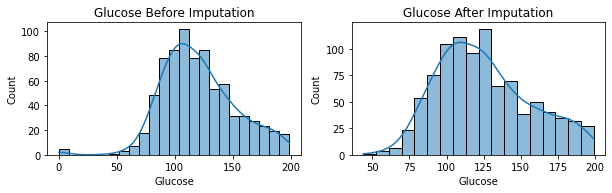

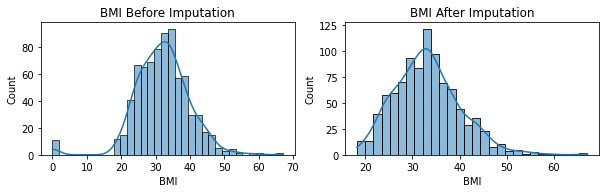

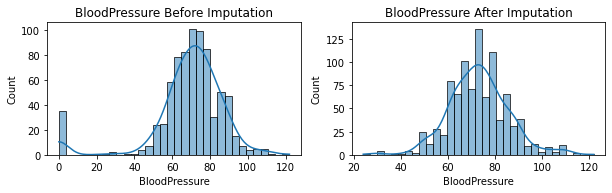

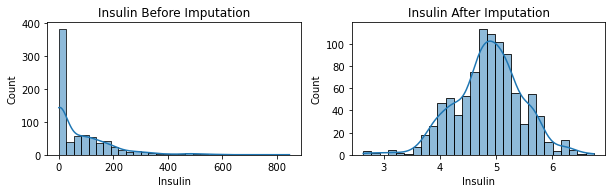

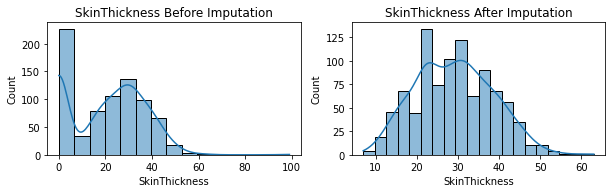

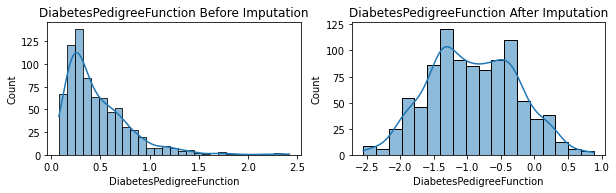

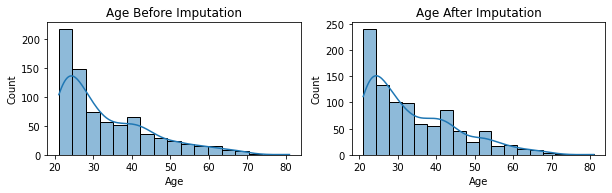

In [65]:
# Comparing the distribution of all the continous features before and after imputation
def Compare_Dist(data,transform_data,features,l):
    for index,feature in enumerate(features):
        fig= plt.figure(figsize=(10,20))
        plt.subplot(l,2,2*(index)+1)
        sns.histplot(data[feature],kde=True)
        plt.title(f"{feature} Before Imputation")

        plt.subplot(l,2,2*(index)+2)
        sns.histplot(transform_data[feature],kde=True)
        plt.title(f"{feature} After Imputation")
        plt.show()
        
Compare_Dist(df,data5,continuous_features,len(continuous_features))

In [66]:
# Chekcing the value of the label wrt outliers of each feature
def Outlier_Record(data,feature,out_lst):
    lst=[]
    for i in range(len(data)):
        if data.loc[i,feature] in out_lst:
            lst.append(data.loc[i,:])
    df=pd.DataFrame(lst,columns=data.columns)
    return df
Outlier_Record(data5,'BMI',IQR('BMI',data5))

Glucose   BMI  BloodPressure       BP_Type   Insulin  SkinThickness  \
120    162.0  53.2           76.0        normal  4.605170           56.0   
125     88.0  55.0           30.0        normal  4.595120           42.0   
177    129.0  67.1          110.0  hypertension  4.867534           46.0   
193    135.0  52.3           72.0        normal  4.998826           45.2   
247    165.0  52.3           90.0  hypertension  6.522093           33.0   
303    115.0  52.9           98.0  hypertension  4.763763           45.2   
445    180.0  59.4           78.0        normal  2.639057           63.0   
673    123.0  57.3          100.0  hypertension  5.480639           35.0   
792     88.0  55.0           30.0        normal  4.595120           42.0   
808    115.0  52.9           98.0  hypertension  4.763763           45.2   
863     88.0  55.0           30.0        normal  4.595120           42.0   
913    129.0  67.1          110.0  hypertension  4.867534           46.0   
926    135.0  52.3           72.0        normal  4.998826           45.2   

     DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  Pregnant_yes  
120                 -0.275754   25            0        1       0             0  
125                 -0.701179   26            1        1       0             1  
177                 -1.142564   26            0        1       0             0  
193                 -0.548181   40           11        1       0             1  
247                 -0.850971   23            0        0       0             0  
303                 -1.565421   28            5        1       0             1  
445                  0.883768   25            0        1       0             0  
673                 -0.127833   22            3        0       0             1  
792                 -0.701179   26            1        1       0             1  
808                 -1.565421   28            5        1       0             1  
863                 -0.701179   26            1        1       0             1  
913                 -1.142564   26            0        1       0             0  
926                 -0.548181   40           11        1       0             1

In [67]:
# v=np.percentile(data4['BMI'],95)
# for i in range(len(data4['BMI'])):
#     if data4.loc[i,'BMI'] in IQR('BMI',data4):
#         data4.loc[i,'BMI']=v
        
# len(IQR('BMI',data4))

In [68]:
# sns.histplot(data=data4,x='BMI',kde=True)

In [69]:
Outlier_Record(data5,'BloodPressure',IQR('BloodPressure',data5))

Glucose   BMI  BloodPressure       BP_Type   Insulin  SkinThickness  \
4      137.0  43.1           40.0        normal  5.123964           35.0   
18     103.0  43.3           30.0        normal  4.418841           38.0   
43     171.0  45.4          110.0  hypertension  5.480639           24.0   
84     137.0  48.8          108.0  hypertension  4.981893           43.0   
106     96.0  22.4          122.0  hypertension  4.239835           14.8   
125     88.0  55.0           30.0        normal  4.595120           42.0   
177    129.0  67.1          110.0  hypertension  4.867534           46.0   
207    162.0  37.7          104.0  hypertension  4.616565           37.0   
362    103.0  39.2          108.0  hypertension  4.870792           37.0   
440    189.0  34.3          104.0  hypertension  5.582110           25.0   
549    189.0  28.5          110.0  hypertension  5.582110           31.0   
597     89.0  27.8           24.0        normal  3.218876           19.0   
599    109.0  23.1           38.0        normal  4.787492           18.0   
658    127.0  39.0          106.0  hypertension  5.402878           38.0   
662    167.0  37.6          106.0  hypertension  5.442418           46.0   
672     68.0  35.5          106.0  hypertension  3.891820           23.0   
691    158.0  42.3          114.0  hypertension  5.737316           36.6   
770    158.0  42.3          114.0  hypertension  5.737316           36.6   
792     88.0  55.0           30.0        normal  4.595120           42.0   
794    162.0  37.7          104.0  hypertension  4.616565           37.0   
833    171.0  45.4          110.0  hypertension  5.480639           24.0   
850    171.0  45.4          110.0  hypertension  5.480639           24.0   
863     88.0  55.0           30.0        normal  4.595120           42.0   
874    189.0  34.3          104.0  hypertension  5.582110           25.0   
890    171.0  45.4          110.0  hypertension  5.480639           24.0   
913    129.0  67.1          110.0  hypertension  4.867534           46.0   
917    189.0  34.3          104.0  hypertension  5.582110           25.0   
937    137.0  48.8          108.0  hypertension  4.981893           43.0   
943    171.0  45.4          110.0  hypertension  5.480639           24.0   

     DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  Pregnant_yes  
4                    0.827678   33            0        1       0             0  
18                  -1.698269   33            1        0       0             1  
43                  -0.327116   54            9        1       0             1  
84                  -1.482805   37            5        1       0             1  
106                 -1.575036   27            1        0       0             1  
125                 -0.701179   26            1        1       0             1  
177                 -1.142564   26            0        1       0             0  
207                 -1.890475   52            5        1       0             1  
362                 -1.187444   65            5        0       1             1  
440                 -0.832409   41            0        1       0             0  
549                 -0.385662   37            4        0       0             1  
597                 -0.581606   21            1        0       0             1  
599                 -0.898942   26            1        0       0             1  
658                 -1.660731   51           11        0       0             1  
662                 -1.801810   43            8        1       0             1  
672                 -1.255266   47           10        0       0             1  
691                 -1.358679   44           13        1       0             1  
770                 -1.358679   44           13        1       0             1  
792                 -0.701179   26            1        1       0             1  
794                 -1.890475   52            5        1       0             1  
833                 -0.

In [70]:
IQR('BloodPressure',data5)

[40.0,
 30.0,
 110.0,
 108.0,
 122.0,
 30.0,
 110.0,
 104.0,
 108.0,
 104.0,
 110.0,
 24.0,
 38.0,
 106.0,
 106.0,
 106.0,
 114.0,
 114.0,
 30.0,
 104.0,
 110.0,
 110.0,
 30.0,
 104.0,
 110.0,
 110.0,
 104.0,
 108.0,
 110.0]

In [71]:
# Replacing the lower outliers of bp with 5 percentile
v=np.percentile(data5['BloodPressure'],5)
for i in range(len(data5['BloodPressure'])):
    if data5.loc[i,'BloodPressure'] in IQR('BloodPressure',data5) and data5.loc[i,'BloodPressure']<v:
        data5.loc[i,'BloodPressure']=v
        
IQR('BloodPressure',data5)

[110.0,
 108.0,
 122.0,
 110.0,
 104.0,
 108.0,
 104.0,
 110.0,
 106.0,
 106.0,
 106.0,
 114.0,
 114.0,
 104.0,
 110.0,
 110.0,
 104.0,
 110.0,
 110.0,
 104.0,
 108.0,
 110.0]

In [72]:
Outlier_Record(data5,'Insulin',IQR('Insulin',data5))

Glucose   BMI  BloodPressure       BP_Type   Insulin  SkinThickness  \
13     189.0  30.1           60.0        normal  6.740519           23.0   
52      88.0  24.4           66.0        normal  3.135494           21.0   
108     83.0  34.3           58.0        normal  2.890372           31.0   
182    117.0  27.7           74.0        normal  3.135494           20.0   
228    197.0  36.7           70.0        normal  6.612041           39.0   
247    165.0  52.3           90.0  hypertension  6.522093           33.0   
323    152.0  26.8           90.0  hypertension  3.367296           33.0   
409    172.0  42.4           68.0        normal  6.361302           49.0   
445    180.0  59.4           78.0        normal  2.639057           63.0   
566     99.0  38.6           72.0        normal  2.890372           30.0   
584    124.0  28.7           76.0        normal  6.396930           24.0   
597     89.0  27.8           52.0        normal  3.218876           19.0   
617     68.0  20.1           62.0        normal  2.708050           13.0   
711    126.0  29.6           78.0        normal  3.091042           27.0   
760     88.0  28.4           58.0        normal  2.772589           26.0   
777    172.0  42.4           68.0        normal  6.361302           49.0   
806    124.0  28.7           76.0        normal  6.396930           24.0   
851    152.0  26.8           90.0  hypertension  3.367296           33.0   

     DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  Pregnant_yes  
13                  -0.921303   59            1        1       1             1  
52                  -1.072945   30            5        0       0             1  
108                 -1.090644   25            3        0       0             1  
182                 -1.207312   21            1        0       0             1  
228                  0.845439   31            4        0       0             1  
247                 -0.850971   23            0        0       0             0  
323                 -0.313342   43           13        1       0             1  
409                 -0.353822   28            1        1       0             1  
445                  0.883768   25            0        1       0             0  
566                 -0.886732   21            1        0       0             1  
584                 -0.375421   52            8        1       0             1  
597                 -0.581606   21            1        0       0             1  
617                 -1.358679   23            2        0       0             1  
711                 -0.823256   40            5        0       0             1  
760                 -0.266573   22            2        0       0             1  
777                 -0.353822   28            1        1       0             1  
806                 -0.375421   52            8        1       0             1  
851                 -0.313342   43           13        1       0             1

In [73]:
# Replacing the lower outliers of insulin with 5 percentile
v=np.percentile(data5['Insulin'],5)
for i in range(len(data5['Insulin'])):
    if data5.loc[i,'Insulin'] in IQR('Insulin',data5) and data5.loc[i,'Insulin']<v:
        data5.loc[i,'Insulin']=v
        
IQR('Insulin',data5)

[6.740519359606223,
 6.612041034833092,
 6.522092798170152,
 6.361302477572996,
 6.396929655216146,
 6.361302477572996,
 6.396929655216146]

In [74]:
Outlier_Record(data5,'SkinThickness',IQR('SkinThickness',data5))

Glucose   BMI  BloodPressure       BP_Type  Insulin  SkinThickness  \
57     100.0  46.8           88.0  hypertension  4.70048           60.0   
445    180.0  59.4           78.0        normal  3.88388           63.0   

     DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  Pregnant_yes  
57                  -0.038741   31            0        0       0             0  
445                  0.883768   25            0        1       0             0

In [75]:
# Replacing the lower outliers of insulin with 5 percentile
v=np.percentile(data5['SkinThickness'],97)
for i in range(len(data5['SkinThickness'])):
    if data5.loc[i,'SkinThickness'] in IQR('SkinThickness',data5):
        data5.loc[i,'SkinThickness']=v
        
IQR('SkinThickness',data5)

[]

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

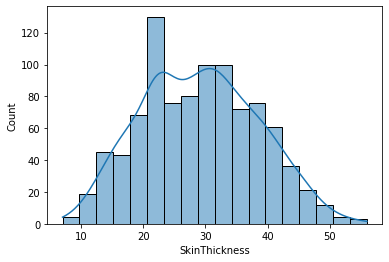

In [76]:
sns.histplot(data=data5,x='SkinThickness',kde=True)

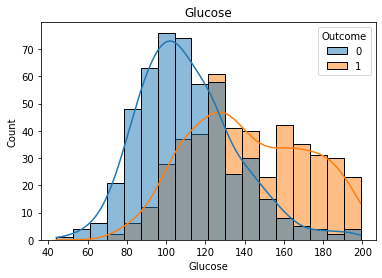

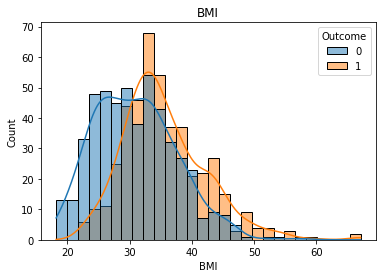

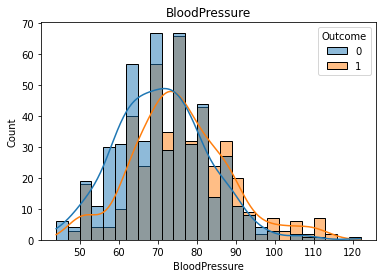

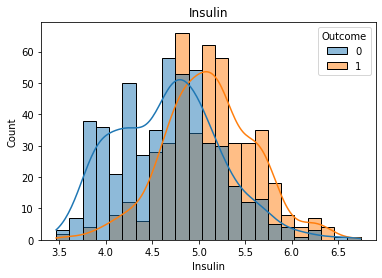

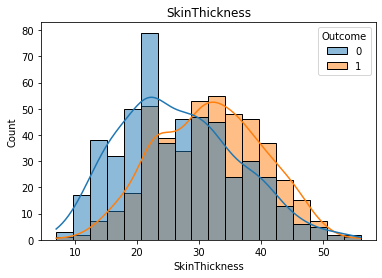

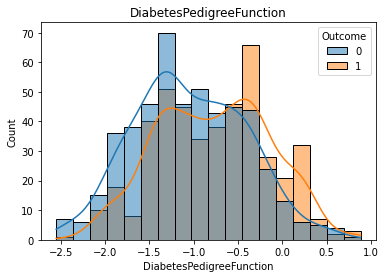

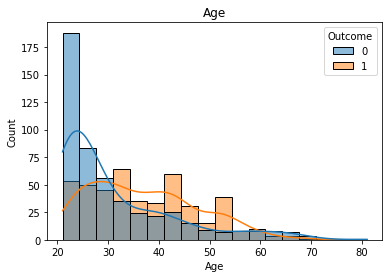

In [77]:
# Lets check the distribution wrt to label
for feature in continuous_features:
    sns.histplot(data=data5,x=feature,hue='Outcome',kde=True)
    plt.title(feature)
    plt.show()

In [78]:
data5['BP_Type'].value_counts()

normal          726
hypertension    224
Name: BP_Type, dtype: int64

In [79]:
bp=pd.get_dummies(data5['BP_Type'],drop_first=True)
bp.columns=['BP_normal']
bp.head()

BP_normal
0          1
1          1
2          1
3          1
4          1

In [80]:
data6=data5.drop('BP_Type',axis=1)
data7=pd.concat([data6,bp],axis=1)
data7.head()

Glucose   BMI  BloodPressure   Insulin  SkinThickness  \
0    148.0  33.6           72.0  5.318151           35.0   
1     85.0  26.6           66.0  4.219834           29.0   
2    183.0  23.3           64.0  5.591840           16.8   
3     89.0  28.1           66.0  4.543295           23.0   
4    137.0  43.1           52.0  5.123964           35.0   

   DiabetesPedigreeFunction  Age  Pregnancies  Outcome  Senior  Pregnant_yes  \
0                 -0.466809   50            6        1       0             1   
1                 -1.046969   31            1        0       0             1   
2                 -0.397497   32            8        1       0             1   
3                 -1.789761   21            1        0       0             1   
4                  0.827678   33            0        1       0             0   

   BP_normal  
0          1  
1          1  
2          1  
3          1  
4          1

In [81]:
for feature in data7.columns:
    if feature not in continuous_features:
        print(f"Unique values of {feature} : {np.unique(data7[feature])}")

Unique values of Pregnancies : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Unique values of Outcome : [0 1]
Unique values of Senior : [0 1]
Unique values of Pregnant_yes : [0 1]
Unique values of BP_normal : [0 1]


In [82]:
for feature in continuous_features:
    print(f"Outliers of {feature} : {len(IQR(feature,data6))}")

Outliers of Glucose : 0
Outliers of BMI : 13
Outliers of BloodPressure : 22
Outliers of Insulin : 7
Outliers of SkinThickness : 0
Outliers of DiabetesPedigreeFunction : 0
Outliers of Age : 9


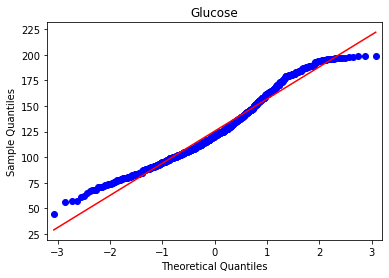

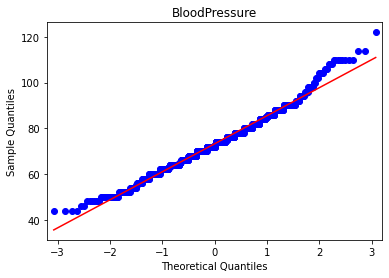

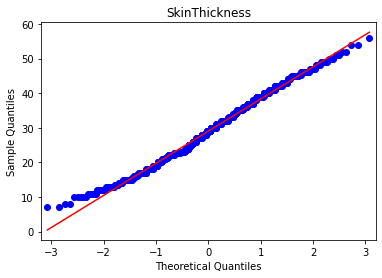

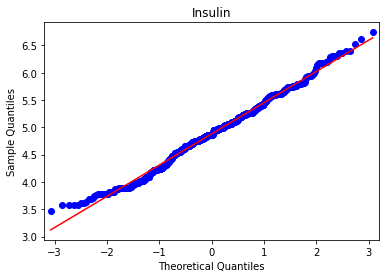

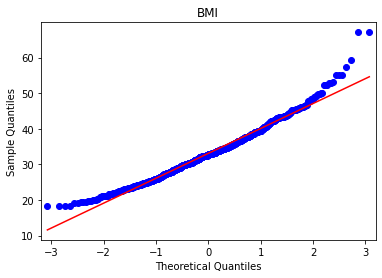

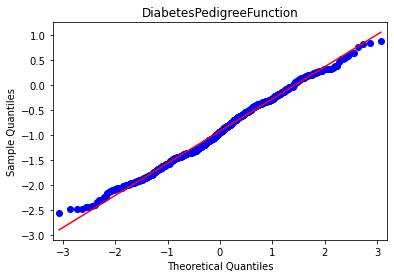

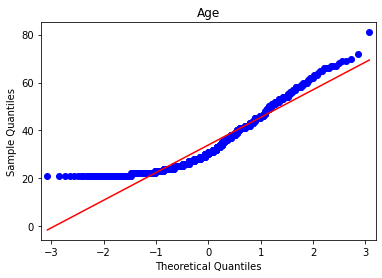

In [83]:
for feature in df.columns:
    if feature not in discrete_numerical_features:
        sm.qqplot(data6[feature],line='s')
        plt.title(feature)
        plt.show()

<AxesSubplot:>

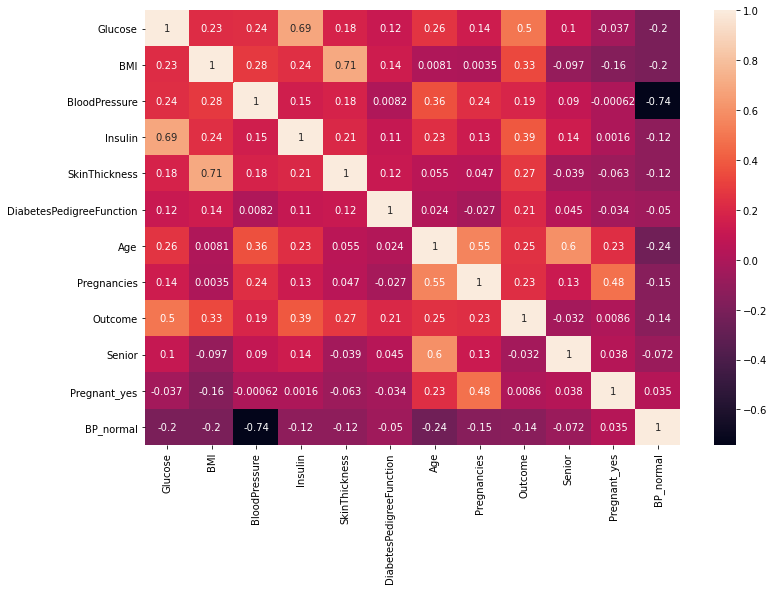

In [84]:
fig= plt.figure(figsize=(12,8))
sns.heatmap(data7.corr(),annot=True)

In [85]:
x=data7.drop('Outcome',axis=1)
y=data7['Outcome']
x.shape,y.shape

((950, 11), (950,))

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((665, 11), (285, 11), (665,), (285,))

In [87]:
# Performing mutual information
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_train,y_train)
mi

array([1.77283100e-01, 1.33581035e-01, 5.28136149e-02, 1.26230214e-01,
       5.47143064e-02, 4.40698533e-02, 1.15534222e-01, 3.95825284e-02,
       6.29748814e-05, 0.00000000e+00, 0.00000000e+00])

In [88]:
grp=pd.Series(mi)
grp.index=x.columns
c=grp.sort_values(ascending=True)

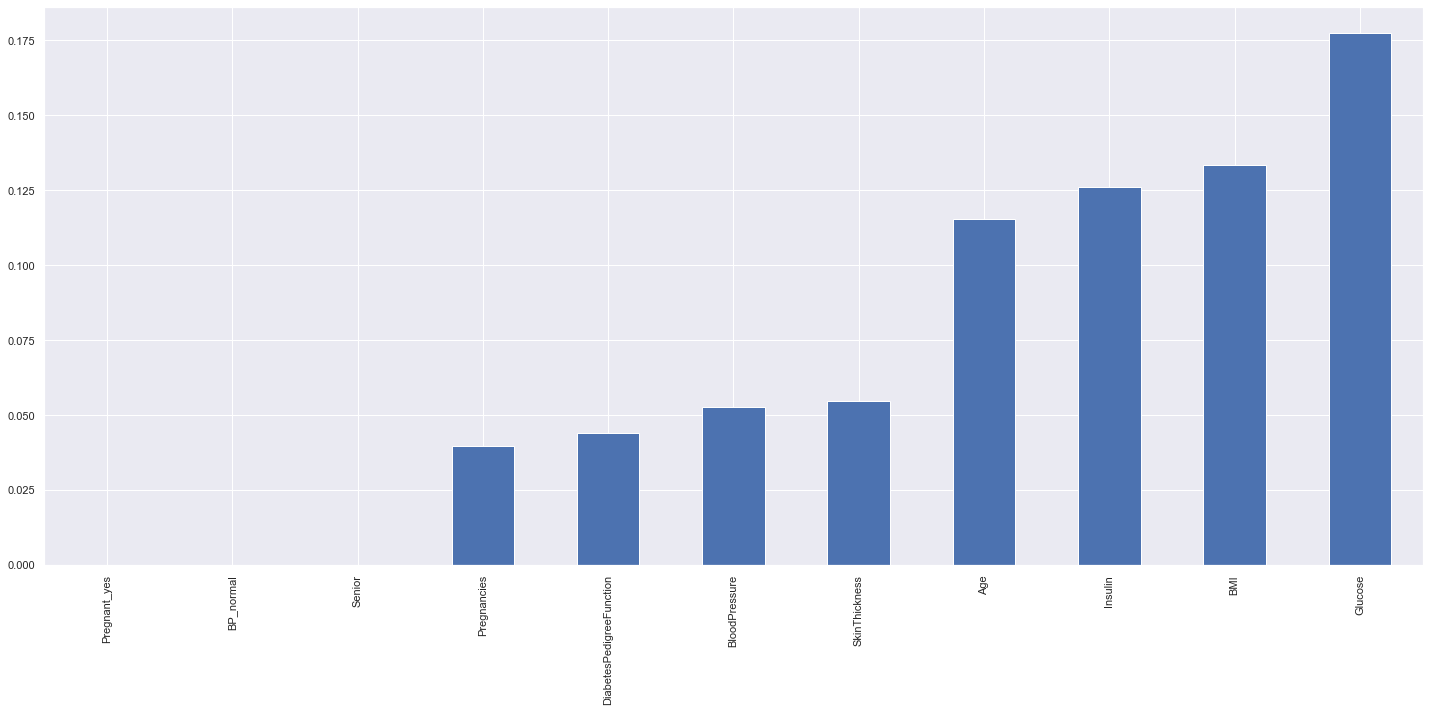

In [89]:
sns.set(rc={'figure.figsize':(24.7,10.27)})
c.plot.bar()
plt.show()

In [90]:
grp.nlargest(n=10,keep='first')# keeping the top 10 features important features

Glucose                     0.177283
BMI                         0.133581
Insulin                     0.126230
Age                         0.115534
SkinThickness               0.054714
BloodPressure               0.052814
DiabetesPedigreeFunction    0.044070
Pregnancies                 0.039583
Senior                      0.000063
Pregnant_yes                0.000000
dtype: float64

In [91]:
top_features1=grp.nlargest(n=10,keep='first').index
top_features1

Index(['Glucose', 'BMI', 'Insulin', 'Age', 'SkinThickness', 'BloodPressure',
       'DiabetesPedigreeFunction', 'Pregnancies', 'Senior', 'Pregnant_yes'],
      dtype='object')

In [92]:
# Performing ANOVA test
from sklearn.feature_selection import f_classif
sel=f_classif(X_train,y_train)
sel

(array([2.23994770e+02, 1.00015878e+02, 2.07245012e+01, 1.36626357e+02,
        7.36243105e+01, 2.78386380e+01, 4.47392846e+01, 3.84447003e+01,
        8.30482337e-01, 1.76899988e-01, 8.52796301e+00]),
 array([7.65337001e-44, 5.01048245e-22, 6.30982151e-06, 7.87486479e-29,
        6.68508799e-17, 1.78816215e-07, 4.78800684e-11, 9.90590577e-10,
        3.62464306e-01, 6.74187279e-01, 3.61607342e-03]))

<AxesSubplot:>

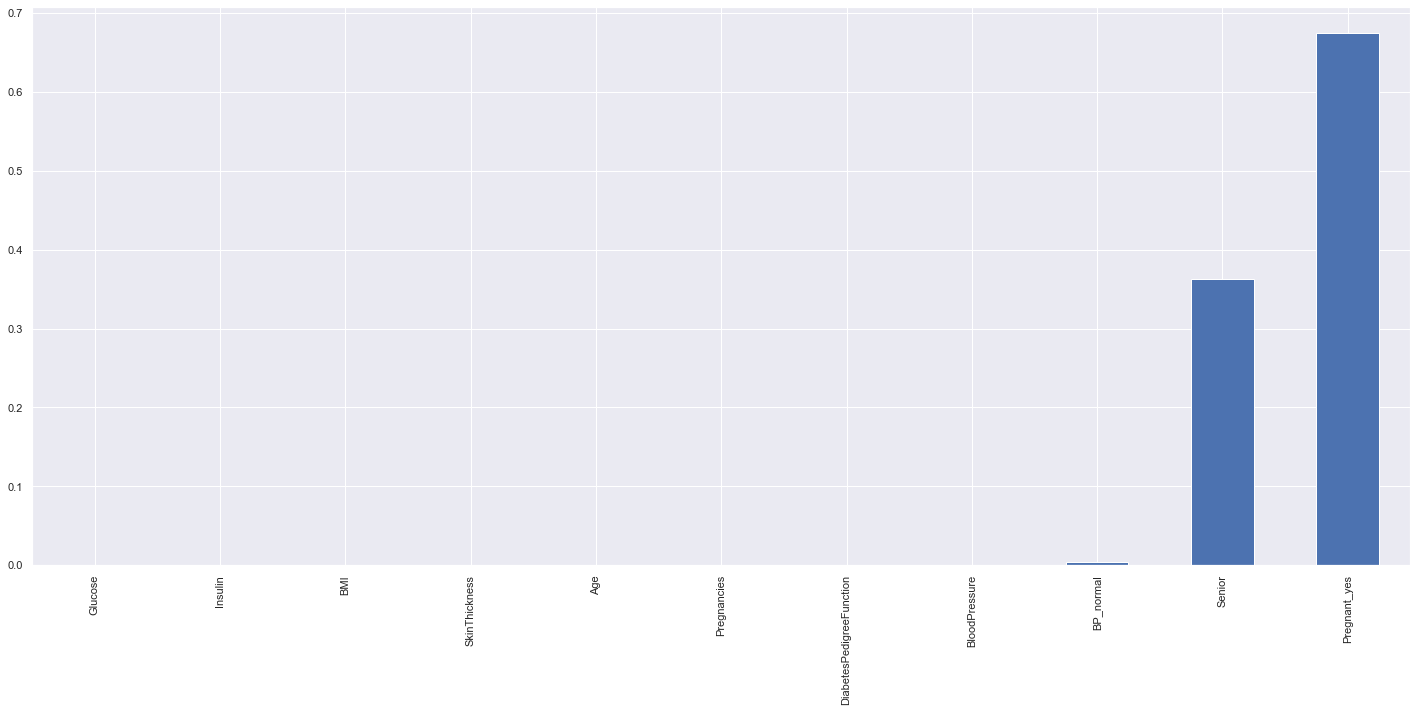

In [93]:
p_values=pd.Series(sel[1])
p_values.index=x.columns
p_values.sort_values(ascending =True,inplace=True)
p_values.plot.bar()

In [94]:
# Features whose p value is less than 0.05 are the important features
p_values[p_values<=0.05]

Glucose                     7.653370e-44
Insulin                     7.874865e-29
BMI                         5.010482e-22
SkinThickness               6.685088e-17
Age                         4.788007e-11
Pregnancies                 9.905906e-10
DiabetesPedigreeFunction    1.788162e-07
BloodPressure               6.309822e-06
BP_normal                   3.616073e-03
dtype: float64

In [95]:
imp_features2=list(p_values[p_values<=0.05].index)
imp_features2

['Glucose',
 'Insulin',
 'BMI',
 'SkinThickness',
 'Age',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'BloodPressure',
 'BP_normal']

In [96]:
#Getting the common features from the 2 tests
common_features=[]
for feature in imp_features2:
    if feature in top_features1:
        common_features.append(feature)
common_features

['Glucose',
 'Insulin',
 'BMI',
 'SkinThickness',
 'Age',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'BloodPressure']

In [97]:
# Taking the common features based on mutual information ,AVOVA and Correlation
X_train1=X_train[common_features]
X_test1=X_test[common_features]
X_train1.shape,X_test1.shape

((665, 8), (285, 8))

In [98]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_scale=mms.fit_transform(X_train1)
X_train_scaled=pd.DataFrame(X_train_scale,columns=X_train1.columns)
X_train_scaled.head()

Glucose   Insulin       BMI  SkinThickness       Age  Pregnancies  \
0  0.219355  0.308906  0.261759       0.558140  0.083333     0.176471   
1  0.296774  0.190031  0.108384       0.176744  0.066667     0.117647   
2  0.870968  0.243993  0.327198       0.534884  0.650000     0.411765   
3  0.438710  0.462119  0.139059       0.325581  0.050000     0.117647   
4  0.664516  0.655650  0.316973       0.716279  0.733333     0.294118   

   DiabetesPedigreeFunction  BloodPressure  
0                  0.336763       0.076923  
1                  0.260732       0.205128  
2                  0.216360       0.653846  
3                  0.398898       0.282051  
4                  0.299226       0.435897

In [99]:
X_test_scale=mms.transform(X_test1)
X_test_scaled=pd.DataFrame(X_test_scale,columns=X_train1.columns)

In [100]:
# Doing crossvalidation on multiple models to get the best model
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

In [101]:
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=xg.XGBClassifier()
scores=[[],[],[],[],[],[],[],[]]
classifiers=[lr,dt,rf,gb,ada,svc,knn,xgb]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    for index,model in enumerate (classifiers):
        model.fit(X_train_fold,y_train_fold)
        p=model.predict(X_test_fold)
        acc=accuracy_score(y_test_fold,p)
        scores[index].append(acc)

C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [102]:
for index,each in enumerate(scores):
    print(f"KFold accuracies of {classifiers[index]} : {each}")

KFold accuracies of LogisticRegression() : [0.8270676691729323, 0.7669172932330827, 0.7518796992481203, 0.7368421052631579, 0.7518796992481203]
KFold accuracies of DecisionTreeClassifier() : [0.8270676691729323, 0.7819548872180451, 0.8120300751879699, 0.7744360902255639, 0.7819548872180451]
KFold accuracies of RandomForestClassifier() : [0.8571428571428571, 0.7894736842105263, 0.8120300751879699, 0.7969924812030075, 0.7744360902255639]
KFold accuracies of GradientBoostingClassifier() : [0.8646616541353384, 0.8120300751879699, 0.8195488721804511, 0.7669172932330827, 0.7669172932330827]
KFold accuracies of AdaBoostClassifier() : [0.8571428571428571, 0.7293233082706767, 0.7894736842105263, 0.7443609022556391, 0.7969924812030075]
KFold accuracies of SVC() : [0.8195488721804511, 0.7669172932330827, 0.7819548872180451, 0.7669172932330827, 0.7819548872180451]
KFold accuracies of KNeighborsClassifier() : [0.7969924812030075, 0.7293233082706767, 0.7293233082706767, 0.7593984962406015, 0.7669172

In [103]:
# Getting mean of each models
for index,each in enumerate(scores):
    print(f"Mean of KFold accuracies of {classifiers[index]} : {np.mean(each)*100}")

Mean of KFold accuracies of LogisticRegression() : 76.69172932330828
Mean of KFold accuracies of DecisionTreeClassifier() : 79.54887218045113
Mean of KFold accuracies of RandomForestClassifier() : 80.60150375939848
Mean of KFold accuracies of GradientBoostingClassifier() : 80.6015037593985
Mean of KFold accuracies of AdaBoostClassifier() : 78.34586466165413
Mean of KFold accuracies of SVC() : 78.34586466165413
Mean of KFold accuracies of KNeighborsClassifier() : 75.6390977443609
Mean of KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_wei

In [104]:
# Checking the vairance in the accuracies of each model
for index,each in enumerate(scores):
    m=np.mean(each)
    var=0
    for x in each:
        var=var + (x-m)*(x-m)
    v=var/len(each)
    print(f"Vairance in KFold accuracies of {classifiers[index]} : {v}")

Vairance in KFold accuracies of LogisticRegression() : 0.000994968624568941
Vairance in KFold accuracies of DecisionTreeClassifier() : 0.00041607778845610216
Vairance in KFold accuracies of RandomForestClassifier() : 0.0008004974843122834
Vairance in KFold accuracies of GradientBoostingClassifier() : 0.001343207643168072
Vairance in KFold accuracies of AdaBoostClassifier() : 0.002021595341737801
Vairance in KFold accuracies of SVC() : 0.00037085194188478794
Vairance in KFold accuracies of KNeighborsClassifier() : 0.0006467296059698105
Vairance in KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_st

In [105]:
# Based on the mean and variance of K fold accuracies of each model
# Selecting Gradient Boosting,XGBoost and Random Forest
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [144]:
from sklearn.metrics import roc_curve,roc_auc_score
def Threshold_Accuracy(model,X_test_scaled,y_test):
    pred_proba=model.predict_proba(X_test_scaled)[:,1]
#     auc_xg = roc_auc_score(y_test, pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    accuracy_ls,fp,fn,tp,tn = [],[],[],[],[]
    for thres in thresholds:
        y_pred = np.where(pred_proba>thres,1,0)
        accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
        fp.append(confusion_matrix(y_test,y_pred)[1,0])
        fn.append(confusion_matrix(y_test,y_pred)[0,1])
        tn.append(confusion_matrix(y_test,y_pred)[1,1])
        tp.append(confusion_matrix(y_test,y_pred)[0,0])
    accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(tp), pd.Series(fn),pd.Series(fp),pd.Series(tn),pd.Series(accuracy_ls)],
                            axis=1)
    return accuracy_ls

In [106]:
# Gradient Boosting 
gb=GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
gb_pred=gb.predict(X_test_scaled)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8
[[118  35]
 [ 22 110]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       153
           1       0.76      0.83      0.79       132

    accuracy                           0.80       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.80      0.80      0.80       285



In [147]:
accuracy_ls=Threshold_Accuracy(gb,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

thresholds  True Positive  False Negative  False Positive  True Negative  \
63    0.550113            124              29              27            105   
69    0.521599            121              32              24            108   
59    0.595562            128              25              31            101   
67    0.532086            122              31              25            107   
65    0.544405            123              30              26            106   
70    0.508175            120              33              23            109   
68    0.522420            121              32              25            107   

    accuracy  
63  0.803509  
69  0.803509  
59  0.803509  
67  0.803509  
65  0.803509  
70  0.803509  
68  0.800000

In [107]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_pred=rf.predict(X_test_scaled)
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.8070175438596491
[[123  30]
 [ 25 107]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       153
           1       0.78      0.81      0.80       132

    accuracy                           0.81       285
   macro avg       0.81      0.81      0.81       285
weighted avg       0.81      0.81      0.81       285



In [148]:
accuracy_ls=Threshold_Accuracy(rf,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

thresholds  True Positive  False Negative  False Positive  True Negative  \
31        0.64            137              16              33             99   
30        0.66            139              14              36             96   
32        0.61            134              19              31            101   
33        0.60            133              20              30            102   
35        0.58            130              23              28            104   
28        0.68            141              12              39             93   
34        0.59            131              22              30            102   

    accuracy  
31  0.828070  
30  0.824561  
32  0.824561  
33  0.824561  
35  0.821053  
28  0.821053  
34  0.817544

In [152]:
# XG Boost
xgb=xg.XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xg_pred=xgb.predict(X_test_scaled)
print(accuracy_score(y_test,xg_pred))
print(confusion_matrix(y_test,xg_pred))
print(classification_report(y_test,xg_pred))

[22:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8210526315789474
[[125  28]
 [ 23 109]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       153
           1       0.80      0.83      0.81       132

    accuracy                           0.82       285
   macro avg       0.82      0.82      0.82       285
weighted avg       0.82      0.82      0.82       285



In [153]:
accuracy_ls=Threshold_Accuracy(xgb,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

thresholds  True Positive  False Negative  False Positive  True Negative  \
38    0.866781            144               9              37             95   
40    0.859634            143              10              36             96   
42    0.842328            141              12              35             97   
37    0.871028            144               9              38             94   
39    0.863362            143              10              37             95   
41    0.857568            142              11              36             96   
49    0.610185            133              20              28            104   

    accuracy  
38  0.838596  
40  0.838596  
42  0.835088  
37  0.835088  
39  0.835088  
41  0.835088  
49  0.831579

In [114]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [120]:
# Selecting Gradient Boosting and Random Forest as the FN rate is less in them .
from sklearn.model_selection import RandomizedSearchCV
xg1=xg.XGBClassifier()
parameters = {
    'n_estimators': [50,100,150,200,300,500],
    'learning_rate': [0,0.01,0.05,0.1],
    'gamma': [0,0.01, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}
randomxg = RandomizedSearchCV(xg1,parameters,cv=5)
randomxg.fit(X_train_scaled,y_train)

C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Snehashis_Saheb\anaconda3\envs

[21:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Snehashis_Saheb\anaconda3\envs

[21:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.8075188  0.80601504        nan
        nan        nan 0.8075188  0.79398496]
  warnings.warn(
C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [121]:
display(randomxg)

Best parameters are: {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 500, 'learning_rate': 0.01, 'gamma': 0.01, 'base_score': 0.5}


nan + or -nan for the {'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 0.01, 'base_score': 1}
nan + or -nan for the {'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 1, 'base_score': 1}
nan + or -nan for the {'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'learning_rate': 0, 'gamma': 0.5, 'base_score': 1}
0.808 + or -0.029 for the {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 500, 'learning_rate': 0.01, 'gamma': 0.01, 'base_score': 0.5}
0.806 + or -0.036 for the {'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 500, 'learning_rate': 0.05, 'gamma': 0, 'base_score': 0.5}
nan + or -nan for the {'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 300, 'learning_rate': 0, 'gamma': 0, 'base_score': 1}
nan + or -nan for the {'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_e

In [122]:
# Selecting Gradient Boosting and Random Forest as the FN rate is less in them .
from sklearn.model_selection import RandomizedSearchCV
gb1 = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,100,150,250,500],
    "max_depth":[1,3,5,7,9,11,13,15],
    "learning_rate":[0.01,0.1,0.5,1,10,100]
}
randomgb = RandomizedSearchCV(gb1,parameters,cv=5)
randomgb.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                      15],
                                        'n_estimators': [5, 50, 100, 150, 250,
                                                         500]})

In [123]:
display(randomgb)

Best parameters are: {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.1}


0.38 + or -0.094 for the {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 10}
0.636 + or -0.097 for the {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 10}
0.776 + or -0.037 for the {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 100}
0.815 + or -0.035 for the {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.1}
0.746 + or -0.054 for the {'n_estimators': 150, 'max_depth': 1, 'learning_rate': 0.01}
0.776 + or -0.046 for the {'n_estimators': 500, 'max_depth': 1, 'learning_rate': 0.01}
0.812 + or -0.033 for the {'n_estimators': 500, 'max_depth': 1, 'learning_rate': 0.1}
0.809 + or -0.037 for the {'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.5}
0.788 + or -0.036 for the {'n_estimators': 5, 'max_depth': 13, 'learning_rate': 10}
0.814 + or -0.031 for the {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}


In [124]:
rf1 = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
randomrf = RandomizedSearchCV(rf1,random_grid,cv=5)
randomrf.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [125]:
display(randomrf)

Best parameters are: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


0.818 + or -0.043 for the {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}
0.824 + or -0.043 for the {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}
0.818 + or -0.05 for the {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
0.803 + or -0.04 for the {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
0.83 + or -0.04 for the {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
0.823 + or -0.031 for the {'n_estimators': 1600, 'min_samples_s

In [126]:
model_xg=xg.XGBClassifier(reg_lambda=1, reg_alpha=0.5, n_estimators=500, learning_rate= 0.01, gamma=0.01, base_score=0.5)
model_xg.fit(X_train_scaled,y_train)
p=model_xg.predict(X_test_scaled)
print(accuracy_score(y_test,p))
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7964912280701755
[[120  33]
 [ 25 107]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       153
           1       0.76      0.81      0.79       132

    accuracy                           0.80       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.80      0.80      0.80       285



In [154]:
accuracy_ls=Threshold_Accuracy(model_xg,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

thresholds  True Positive  False Negative  False Positive  True Negative  \
48    0.658620            134              19              34             98   
46    0.691823            136              17              37             95   
47    0.676058            135              18              36             96   
62    0.481914            119              34              21            111   
49    0.637921            131              22              33             99   
44    0.707283            137              16              40             92   
61    0.484546            119              34              22            110   

    accuracy  
48  0.814035  
46  0.810526  
47  0.810526  
62  0.807018  
49  0.807018  
44  0.803509  
61  0.803509

In [128]:
model_gb=GradientBoostingClassifier(learning_rate=0.01,max_depth=9,n_estimators=250)
model_gb.fit(X_train_scaled,y_train)
p=model_gb.predict(X_test_scaled)
print(accuracy_score(y_test,p))
print(confusion_matrix(y_test,p))
print(classification_report(y_test,p))

0.7929824561403509
[[116  37]
 [ 22 110]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       153
           1       0.75      0.83      0.79       132

    accuracy                           0.79       285
   macro avg       0.79      0.80      0.79       285
weighted avg       0.80      0.79      0.79       285



In [155]:
accuracy_ls=Threshold_Accuracy(model_gb,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

thresholds  True Positive  False Negative  False Positive  True Negative  \
43    0.795896            141              12              36             96   
41    0.811543            142              11              37             95   
42    0.810332            141              12              37             95   
44    0.795677            140              13              36             96   
40    0.812823            142              11              38             94   
48    0.677960            134              19              31            101   
45    0.731428            137              16              34             98   

    accuracy  
43  0.831579  
41  0.831579  
42  0.828070  
44  0.828070  
40  0.828070  
48  0.824561  
45  0.824561

In [129]:
model_rf=RandomForestClassifier(n_estimators=1400,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=70,bootstrap=False)
model_rf.fit(X_train_scaled,y_train)
p1=model_rf.predict(X_test_scaled)
print(accuracy_score(y_test,p1))
print(confusion_matrix(y_test,p1))
print(classification_report(y_test,p1))

0.8140350877192982
[[123  30]
 [ 23 109]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       153
           1       0.78      0.83      0.80       132

    accuracy                           0.81       285
   macro avg       0.81      0.81      0.81       285
weighted avg       0.82      0.81      0.81       285



In [156]:
accuracy_ls=Threshold_Accuracy(model_rf,X_test_scaled,y_test)
accuracy_ls.columns = ['thresholds','True Positive','False Negative','False Positive','True Negative','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(7)

thresholds  True Positive  False Negative  False Positive  True Negative  \
41    0.647476            139              14              35             97   
53    0.519345            128              25              24            108   
37    0.690000            141              12              39             93   
52    0.519488            128              25              26            106   
50    0.535524            129              24              27            105   
48    0.540845            130              23              28            104   
40    0.649583            139              14              37             95   

    accuracy  
41  0.828070  
53  0.828070  
37  0.821053  
52  0.821053  
50  0.821053  
48  0.821053  
40  0.821053

In [157]:
# from sklearn.metrics import roc_curve,roc_auc_score
# pred_proba_gb=model.predict_proba(X_test_scaled)[:,1]
# auc_gb = roc_auc_score(y_test, pred_proba_gb)
# fpr_gb, tpr_gb, thresholds = roc_curve(y_test, pred_proba_gb)
# print(f"AUC_ROC (GB)score :{auc_gb}")

# pred_proba_gb1=model1.predict_proba(X_test_scaled)[:,1]
# auc_gb1 = roc_auc_score(y_test, pred_proba_gb1)
# fpr_gb1, tpr_gb1, thresholds1 = roc_curve(y_test, pred_proba_gb1)
# print(f"AUC_ROC (RF)score :{auc_gb1}")
# plt.figure(figsize=(10, 7))
# plt.plot(fpr_gb1, tpr_gb1, label=f'AUC of RF(Hypertune) = {auc_gb1:.2f}')

# plt.plot(fpr_gb, tpr_gb, label=f'AUC of GB (Hypertune)) = {auc_gb:.2f}')

# plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
# plt.title('ROC Curve', size=20)
# plt.xlabel('False Positive Rate', size=14)
# plt.ylabel('True Positive Rate', size=14)
# plt.legend();

In [ ]:
# So based on the FP and FN rate we are selecting random forest with a threshold of 0.519345 along with hyperparameter optimization

In [158]:
threshold = 0.519345
predicted_proba = model_rf.predict_proba(X_test_scaled)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(confusion_matrix(y_test,predicted))
print(f"Accuracy on Test set: {accuracy_score(y_test,predicted)}")
print(classification_report(y_test,predicted))

[[127  26]
 [ 23 109]]
Accuracy on Test set: 0.8280701754385965
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       153
           1       0.81      0.83      0.82       132

    accuracy                           0.83       285
   macro avg       0.83      0.83      0.83       285
weighted avg       0.83      0.83      0.83       285



In [159]:
import pickle
pickle.dump(mms,open("diabetes_scaler.pkl",'wb'))
pickle.dump(model_rf, open("diabetes_model.pkl", 'wb'))

In [160]:
X_train_scaled.head()

Glucose   Insulin       BMI  SkinThickness       Age  Pregnancies  \
0  0.219355  0.308906  0.261759       0.558140  0.083333     0.176471   
1  0.296774  0.190031  0.108384       0.176744  0.066667     0.117647   
2  0.870968  0.243993  0.327198       0.534884  0.650000     0.411765   
3  0.438710  0.462119  0.139059       0.325581  0.050000     0.117647   
4  0.664516  0.655650  0.316973       0.716279  0.733333     0.294118   

   DiabetesPedigreeFunction  BloodPressure  
0                  0.336763       0.076923  
1                  0.260732       0.205128  
2                  0.216360       0.653846  
3                  0.398898       0.282051  
4                  0.299226       0.435897